## Question 5

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

## Part (a): Data Loading and Preprocessing

In [13]:
df = pd.read_excel("Concrete_Data.xlsx")

#renaming some columns to make it easier for reference in the code
df.columns = [
    "Cement",
    "Slag",
    "FlyAsh",
    "Water",
    "Superplasticizer",
    "CoarseAggregate",
    "FineAggregate",
    "Age",
    "Strength"
]

print("First 5 rows of the dataset:")
display(df.head())

#checking for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


First 5 rows of the dataset:


,Cement,Slag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075



Missing values in each column:
Cement              0
Slag                0
FlyAsh              0
Water               0
Superplasticizer    0
CoarseAggregate     0
FineAggregate       0
Age                 0
Strength            0
dtype: int64


In [14]:
#here we are separating the variables into the features and the target where the Compressive Strength, or Strength
#as we renamed it is the target.
X = df.drop("Strength", axis=1)  #all columns except Strength
y = df["Strength"]               

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nShape of training features:", X_train.shape)
print("Shape of testing features:", X_test.shape)


Shape of training features: (824, 8)
Shape of testing features: (206, 8)


## Part (b): Implementing Linear Regression

In [15]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_test)

mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print(f"MSE: {mse_lin:.2f}")
print(f"R^2: {r2_lin:.2f}")

MSE: 95.98
R^2: 0.63


## Part (c): Implementing Polynomial Regression

In [17]:
degrees = [2, 3, 4]
mse_poly_list = []
r2_poly_list = []

for i in degrees:
    #transforming the data features to polynomials of degree i
    poly = PolynomialFeatures(degree=i)
    
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train)
    
    y_pred_poly = poly_reg.predict(X_test_poly)
    
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    r2_poly = r2_score(y_test, y_pred_poly)
    
    mse_poly_list.append(mse_poly)
    r2_poly_list.append(r2_poly)
    
    print(f"\n=== Polynomial Regression (degree = {i}) ===")
    print(f"MSE: {mse_poly:.2f}")
    print(f"R^2: {r2_poly:.2f}")



=== Polynomial Regression (degree = 2) ===
MSE: 55.59
R^2: 0.78

=== Polynomial Regression (degree = 3) ===
MSE: 40.27
R^2: 0.84

=== Polynomial Regression (degree = 4) ===
MSE: 1353.56
R^2: -4.25


## Part (d): Visualizing and Comparing Results

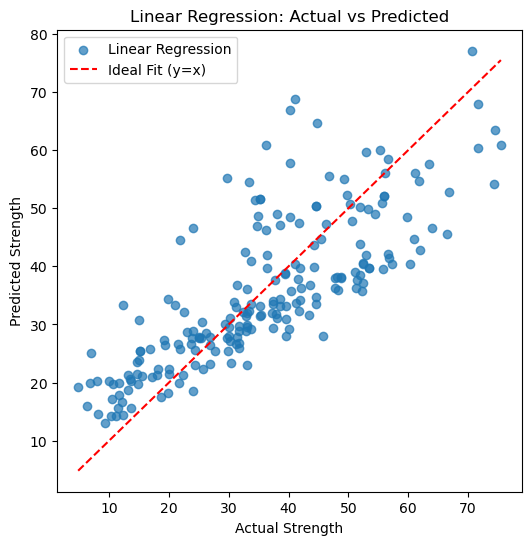

In [20]:
#Linear Regression Plotting
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_lin, alpha=0.7, label='Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color='red', linestyle='--', label='Ideal Fit (y=x)')
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual Strength")
plt.ylabel("Predicted Strength")
plt.legend()
plt.show()

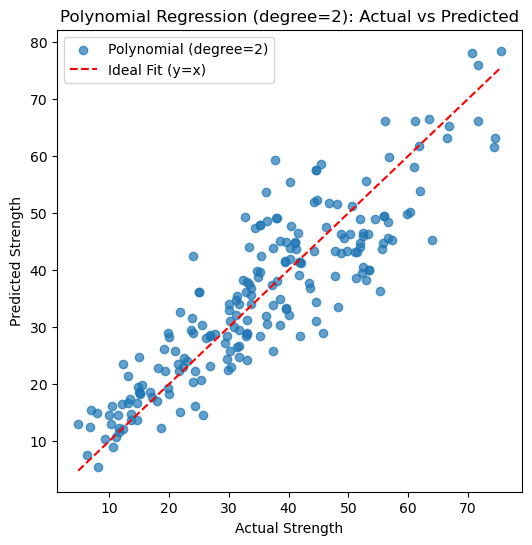

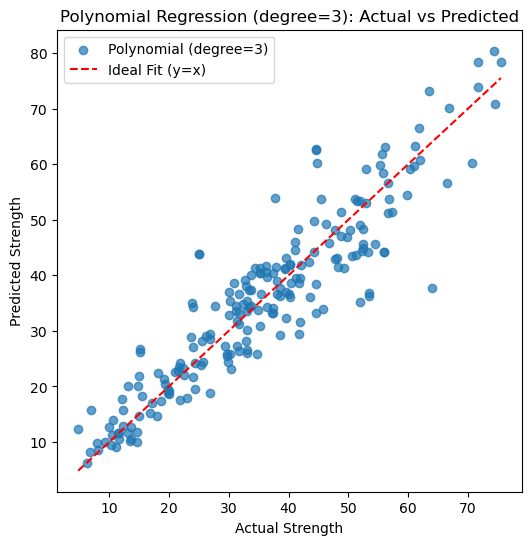

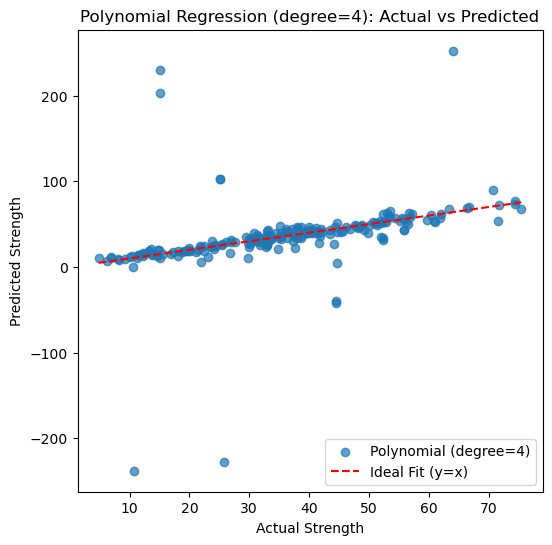

In [21]:
#Polynomial Regression Plotting
for i in degrees:
    poly = PolynomialFeatures(degree=i)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train)
    
    y_pred_poly = poly_reg.predict(X_test_poly)
    
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred_poly, alpha=0.7, 
                label=f'Polynomial (degree={i})')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             color='red', linestyle='--', label='Ideal Fit (y=x)')
    plt.title(f"Polynomial Regression (degree={i}): Actual vs Predicted")
    plt.xlabel("Actual Strength")
    plt.ylabel("Predicted Strength")
    plt.legend()
    plt.show()

In [29]:
#comparison of MSE and R^2 of all models listed
print("\nComparison of All Models:")
print(f"Linear Regression: MSE = {mse_lin:.2f}, R^2 = {r2_lin:.2f}")
for i, d in enumerate(degrees):
    print(f"Polynomial Deg = {d}: MSE = {mse_poly_list[i]:.2f}, R^2 = {r2_poly_list[i]:.2f}")


Comparison of All Models:
Linear Regression: MSE = 95.98, R^2 = 0.63
Polynomial Deg = 2: MSE = 55.59, R^2 = 0.78
Polynomial Deg = 3: MSE = 40.27, R^2 = 0.84
Polynomial Deg = 4: MSE = 1353.56, R^2 = -4.25


## Part (e): Bias-Variance Tradeoff Analysis

1) The Linear Regression Model has High Bias and Low Variance as it fits linearly.
2) The Higher Degree Polynomial Models (of example degree 4) have low biases and high variances as they track and follow the data more efficiently and closely.
3) Since the linear model would underfit the data and the higher degree polynomial would overfit the data, clearly a lower degree polynomial (of example degree 2) would best fit the data and therefore achieve a balance between bias and variance. 

1) As the degree of the polynomial starts to increase, the complexity and thus by consequence the flexibility of the model also starts to increase and so the model starts to capture random noise as well thus overfitting the data.